In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [84]:
XStartingTargetPosition = -25
XEndingTargetPosition = 25
YStartingTargetPosition = -25
YEndingTargetPosition = 25
TargetOuterRadius = 25
TargetInnerRadius = 0

TargetCellNumber = 50
XTargetCellSize = (XEndingTargetPosition - XStartingTargetPosition)/TargetCellNumber
YTargetCellSize = (XEndingTargetPosition - XStartingTargetPosition)/TargetCellNumber
YTargetCenterPosition = 0
XTargetCenterPosition = 0


AK_Height = 147
ChimneyHeight = 30
ChimneyRadius = 25
StartingPlanePosition = -250
EndingPlanePosition = 250


def ChimneyIntersect(x1,y1,x2,y2,h,R):
    value = (-h*((-2)*x1*x2 + 2*x2**2 - 2*y1*y2 + 2*y2**2 + np.sqrt((2*x1*x2 - 2*x2**2 + 2*y1*y2 - 2*y2**2)**2 - 4*(-R**2 + x2**2 + y2**2)*(x1**2 - 2*x1*x2 + x2**2 + y1**2 - 2*y1*y2 + y2**2)))/(2*(x1**2 - 2*x1*x2 + x2**2 + y1**2 - 2*y1*y2 + y2**2)))
    return value

In [118]:
%%time
XCount = 0
g = np.zeros(501)
XPlane = StartingPlanePosition
while XPlane <= EndingPlanePosition: 
    XTarget = XStartingTargetPosition
    while XTarget <= XEndingTargetPosition:
        YTarget = YStartingTargetPosition
        while YTarget <= YEndingTargetPosition:
            
            TargetShape = np.sqrt(XTarget**2+YTarget**2)
            PlaneTargetCellsDistance = np.sqrt((XTarget-XPlane)**2+YTarget**2)
            
            if TargetInnerRadius <= TargetShape <= TargetOuterRadius:
                
                if ChimneyHeight != 0:
                    
                    if PlaneTargetCellsDistance > TargetOuterRadius:
                            
                            if ChimneyIntersect(XPlane,0,XTarget,YTarget,AK_Height,ChimneyRadius) < -ChimneyHeight:
                                g[XCount] += (AK_Height**2)/((AK_Height**2 + PlaneTargetCellsDistance**2)**2)
                            else: pass
                             
                    else: g[XCount] += (AK_Height**2)/((AK_Height**2 + PlaneTargetCellsDistance**2)**2) 
            
                else: g[XCount] += (AK_Height**2)/((AK_Height**2 + PlaneTargetCellsDistance**2)**2)  
            
            else: pass    
                      
            
            YTarget += YTargetCellSize
        XTarget += XTargetCellSize
    XPlane += 1
    XCount += 1        

Wall time: 9.72 s


In [110]:
%%script false --no-raise-error
%%time
XCount=0
YCount=0
G = np.zeros([501,501])
YPlane = StartingPlanePosition
while YPlane <= EndingPlanePosition:
    XPlane = StartingPlanePosition
    while XPlane <= EndingPlanePosition: 
        XTarget = XStartingTargetPosition
        while XTarget <= XEndingTargetPosition:
            YTarget = YStartingTargetPosition
            while YTarget <= YEndingTargetPosition:

                TargetShape = np.sqrt(XTarget**2+YTarget**2)
                PlaneTargetCellsDistance = np.sqrt((XTarget-XPlane)**2+(YTarget-YPlane)**2)

                if TargetInnerRadius <= TargetShape <= TargetOuterRadius:

                    if ChimneyHeight != 0:

                        if PlaneTargetCellsDistance > TargetOuterRadius:

                                if ChimneyIntersect(XPlane,YPlane,XTarget,YTarget,AK_Height,ChimneyRadius) < -ChimneyHeight:
                                    G[XCount,YCount] += (AK_Height**2)/((AK_Height**2 + PlaneTargetCellsDistance**2)**2)
                                else: pass

                        else: G[XCount,YCount] += (AK_Height**2)/((AK_Height**2 + PlaneTargetCellsDistance**2)**2) 

                    else: G[XCount,YCount] += (AK_Height**2)/((AK_Height**2 + PlaneTargetCellsDistance**2)**2)  

                else: pass    


                YTarget += YTargetCellSize
            XTarget += XTargetCellSize
        XPlane += 1
        XCount += 1
    YPlane += 1
    YCount += 1
    XCount = 0

Couldn't find program: 'false'


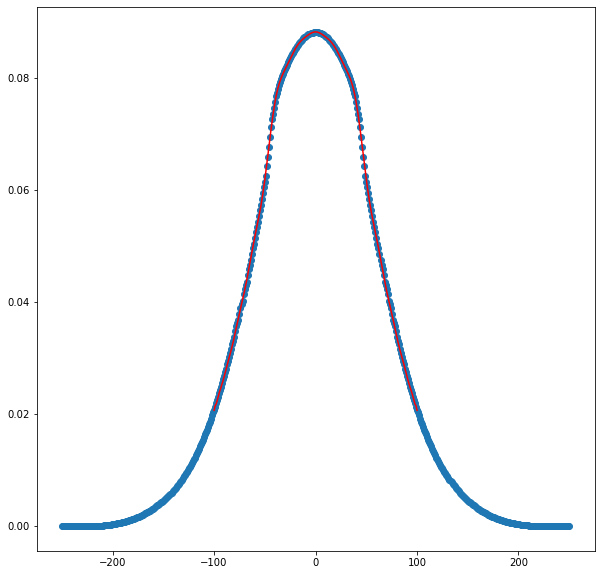

In [136]:
#G.columns = np.arange(-250,251,1)
g = pd.DataFrame(g)
g.index = np.arange(-250,251,1)
G = np.poly1d(np.polyfit(g.index[150:-150],g[0][150:-150],30))
plt.scatter(g.index,g[0])
plt.plot(g.index[150:-150],G(g.index[150:-150]), "r")

In [70]:
%%script false --no-raise-error
plt.imshow(G, cmap='nipy_spectral',interpolation='gaussian', extent=[-250,250,-250,250])
plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel("",fontsize=50)
plt.gca().invert_yaxis()  #odwraca oś Y
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

Couldn't find program: 'false'


In [138]:
G(65)

0.04673933245096605